# Linear Regression on Insurance Premium Data
Health Insurance Premium charges based on Gender, BMI and other characteristics

METRO COLLOEGE OF TECHNOLOGY

In [ ]:
Prepared by : Shalu Vavakunju
Instructor  : Gitimoni Saikia

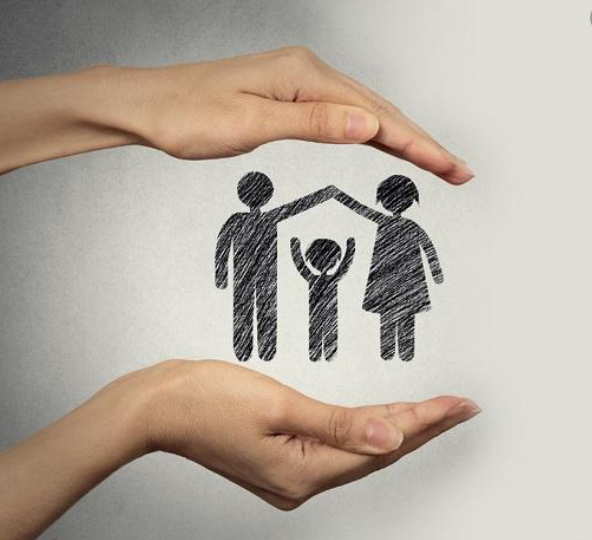

In [76]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [77]:
# import the data
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
# Extract Column Names of a Pandas Dataframe
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
df.info() # Checking the data type of attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
df.shape # Checking the number of rows and columns. row numbers=1338 and 7 columns

(1338, 7)

# Descriptive summary of Data

In [81]:
df.describe() # Checking the summary statistics of continuous variables

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Checking Missing Values

In [82]:
#checking the missing values
df.isna().mean()
#This dataset don't have missing values

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Handling Duplicates

In [83]:
#Checking for duplicates and found 1 record
df.duplicated().sum()

1

In [86]:
df = df.drop_duplicates() #drop the duplicate row 
df.duplicated().sum()

0

In [87]:
df.region.value_counts() # Checking the region wise count to see number of policy holders associated with each region

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [88]:
df.nunique() #checking number of rows for each variables

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Checking the Distribution of Charges

<AxesSubplot:xlabel='charges', ylabel='Density'>

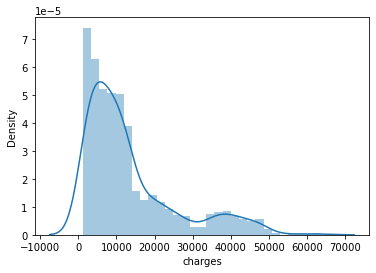

In [89]:
sns.distplot(df['charges']) # Checking the distribution of dependent variable Charges

# Checking for Outliers

<AxesSubplot:ylabel='bmi'>

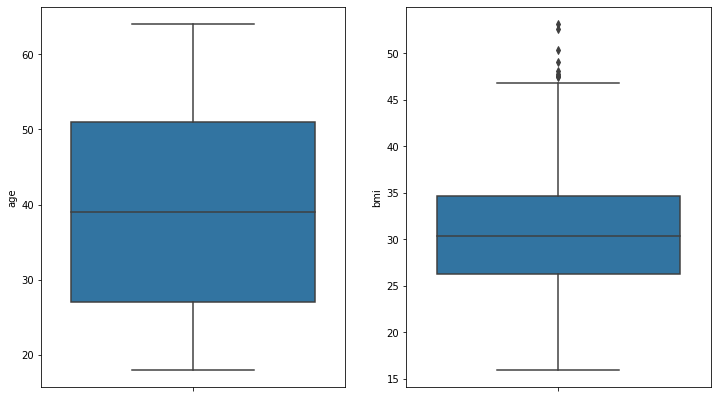

In [74]:
# checking the outliers of age and bmi attributes
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.boxplot(y=df['age'])
plt.subplot(1,2,2)
sns.boxplot(y=df['bmi'])

<AxesSubplot:ylabel='charges'>

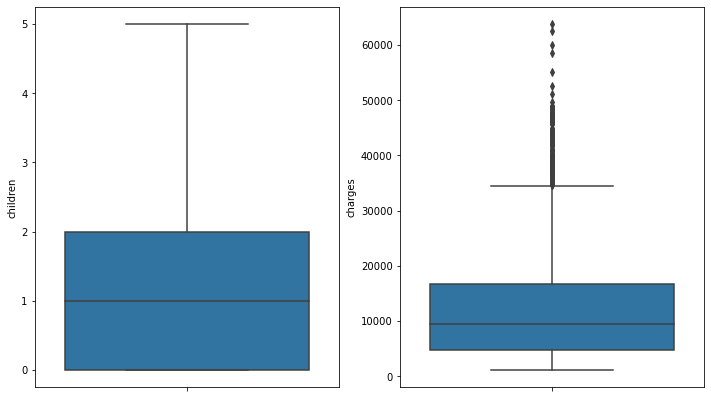

In [75]:
# checking the outliers of children and charges attributes
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.boxplot(y=df['children'])
plt.subplot(1,2,2)
sns.boxplot(y=df['charges'])

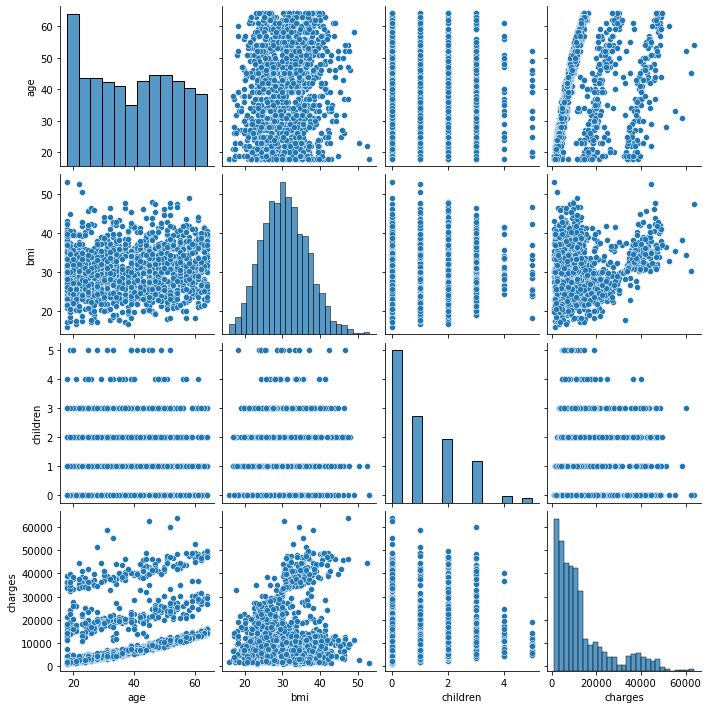

In [13]:
sns.pairplot(df)

In [ ]:
From the pair plot it is clearly showing age and bmi is  related with Charges(dependent variable)

# Checking Co-relation

In [14]:
# We next observe and measure the correlation between each features.
#Correlation Matrix-checking the linear association between the independent variables
#-1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


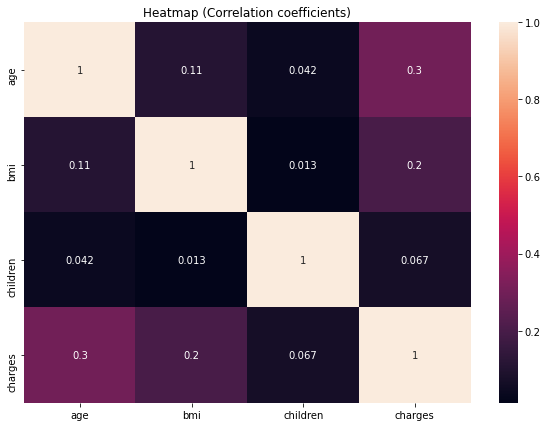

In [15]:
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, color = 'yellow')
plt.title('Heatmap (Correlation coefficients)')
plt.show()

In [ ]:
Age and bmi shows good correlation with dependent variable Charges

# Shuffling Rows

In [17]:
#Shuffle the rows of the dataframe for proper sampling
df = df.sample(frac = 1, random_state=0)


# Encoding

In [18]:
data=pd.get_dummies(df,columns=['sex','smoker','region'])
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1248,18,39.82,0,1633.9618,1,0,1,0,0,0,1,0
610,47,29.37,1,8547.6913,1,0,1,0,0,0,1,0
393,49,31.35,1,9290.1395,0,1,1,0,1,0,0,0
503,19,30.25,0,32548.3405,0,1,0,1,0,0,1,0
198,51,18.05,0,9644.2525,1,0,1,0,0,1,0,0


# Analyzing collinearity of Region and sex with dependent and independent variables

<AxesSubplot:xlabel='region', ylabel='bmi'>

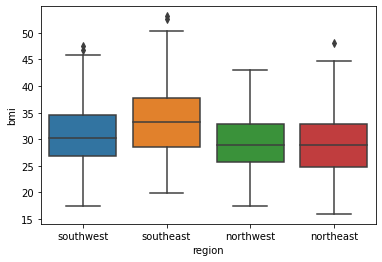

In [94]:
#Analyzing region and bmi attributes
sns.boxplot(x='region', y='bmi', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

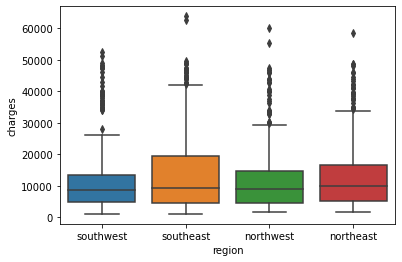

In [95]:
#Analyzing region and charges attributes
sns.boxplot(x='region', y='charges', data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

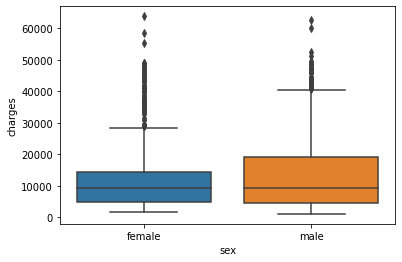

In [93]:
#Analyzing sex and charges attributes
sns.boxplot(x='sex', y='charges', data=df)

# Extracting Dependent and Independent variables

In [24]:
#dependent,independent variables
y = data.charges
X= data.drop(['charges','region_northeast','region_northwest','region_southeast','region_southwest','sex_male','sex_female'], axis=1)

In [25]:
#showing first 5 rows of X
X.head()

,age,bmi,children,smoker_no,smoker_yes
1248,18,39.82,0,1,0
610,47,29.37,1,1,0
393,49,31.35,1,1,0
503,19,30.25,0,0,1
198,51,18.05,0,1,0


In [22]:
#showing first 5 rows of y
y.head()

1248     1633.9618
610      8547.6913
393      9290.1395
503     32548.3405
198      9644.2525
Name: charges, dtype: float64

# Checking p-values of independent variables(X)

In [26]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        20:28:56   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -129.0829    630.295     -0.205      0.8

# Backward Feature Elimination for variables with p value > .05

In [27]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        20:29:09   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          257.7728     11.910     21.644      0.0

In [28]:
lr.pvalues.idxmax() # checking variable having maximum pvalues

'children'

In [29]:
lr.pvalues.max() #checking the maximum pvalue

0.0006212001132857714

In [30]:
X.head()

,age,bmi,children,smoker_no,smoker_yes
1248,18,39.82,0,1,0
610,47,29.37,1,1,0
393,49,31.35,1,1,0
503,19,30.25,0,0,1
198,51,18.05,0,1,0


# k-fold cross validation 

In [59]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.7441785884939818

# Modelling data by splitting to Train and Test

In [60]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
#20% of data for test and 80% for train data

# Linear Regression

In [61]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
#Fit Train data to train the model
model.fit(X_train,y_train)

LinearRegression()

In [63]:
#Test accuracy
model.score(X_test,y_test)

0.7470490032846058

In [64]:
#predict y values
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
import math

print('r² value : ',r2_score(y_test,y_pred)) #r^2
print('Mean squared error (MSE) : ',mean_squared_error(y_test,y_pred)) #MSE-how close a regression line is to  a set of points.
print('Root Mean Square Error (RMSE): ',math.sqrt(mean_squared_error(y_test,y_pred))) # RMSE

r² value :  0.7470490032846058
Mean squared error (MSE) :  42442480.55217105
Root Mean Square Error (RMSE):  6514.789371282164


In [66]:
#dimensions of data
n=len(X_test)
n

268

In [68]:
k=len(X_test.iloc[0])
k

5

In [69]:
#checking R2 score y test and y pred
R2=r2_score(y_test,y_pred)
R2

0.7470490032846058

# Adjusted R^2

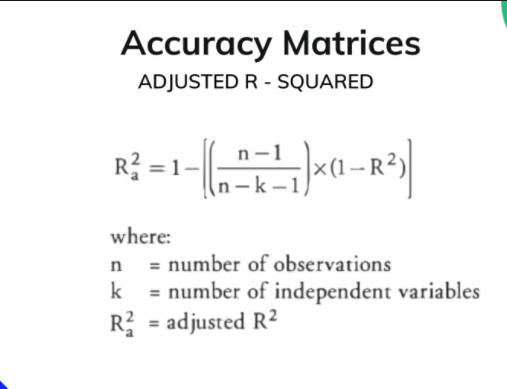

In [50]:
Adj_R2=1-((n-1)*(1-R2)/(n-k-1))
print(Adj_R2)

0.7422216941869837


In [51]:
model.intercept_ #b0

-200.40884415541768

In [52]:
model.coef_ #b1

array([   265.5734557 ,    306.74561689,    520.48718908, -11778.56796504,
        11778.56796504])

In [55]:
#r^2 coefficient of determination

model.score(X_train,y_train)   #Training score

0.7497483185268816

In [56]:
model.score(X_test,y_test)    #Test score

0.7470490032846058